In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
def screen_data(df):
    print('-'*40)
    print('Columns : ',df.columns.to_list())
    print('-'*40)
    print('Total entries : ',df.shape[0])
    print('-'*40)
    print('Missing Values in the columns : \n')
    print(df.isnull().sum())
    print('-'*40)
    print('Unique Value Counts : \n')
    print(df.nunique())
    print('-'*40)

In [4]:
screen_data(df)

----------------------------------------
Columns :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------
Total entries :  891
----------------------------------------
Missing Values in the columns : 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
----------------------------------------


In [5]:
screen_data(df_test)

----------------------------------------
Columns :  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------
Total entries :  418
----------------------------------------
Missing Values in the columns : 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64
----------------------------------------


In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
def feature_process(df):
    df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)  # Fix missing values in Embarked if any
    df['Fare'].fillna(df['Fare'].mean() , inplace=True)  # Fix missing values in Fare
    df['Age'].fillna(df['Age'].median() , inplace=True)  # Put median value for Age
    
    if 'Cabin' in df.columns:
        df.drop('Cabin', axis = 1, inplace = True)  # drop Cabin Column
    
    if 'Ticket' in df.columns:
        df.drop('Ticket', axis = 1, inplace = True)  # drop Ticket Column , being a ticket number it has no relevance
    
    df['Age_cd'] = pd.cut(df['Age'], 10, precision=0).astype('category').cat.codes  # new Column to bucket the age ranges and putting code for it
    

#     df['Fare_range'] = pd.cut(df_train['Fare'], 10, precision=0)  # new Column
    
    df['Embarked_cd'] = df['Embarked'].astype('category').cat.codes # new Column
    
#     df['Title_cd'] = df['Name'].map(check_title).astype('category').cat.codes # new Column
    
    df['Sex_cd'] = df['Sex'].astype('category').cat.codes  # Change sex to codes
           
    print("Preprocessing on the data complete ..")

In [8]:
feature_process(df)
feature_process(df_test)

Preprocessing on the data complete ..
Preprocessing on the data complete ..


In [9]:
screen_data(df)

----------------------------------------
Columns :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_cd', 'Embarked_cd', 'Sex_cd']
----------------------------------------
Total entries :  891
----------------------------------------
Missing Values in the columns : 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Age_cd         0
Embarked_cd    0
Sex_cd         0
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
Age_cd          10
Embarked_cd      4
Sex_cd           2
dtype: int64
----------------------------------------


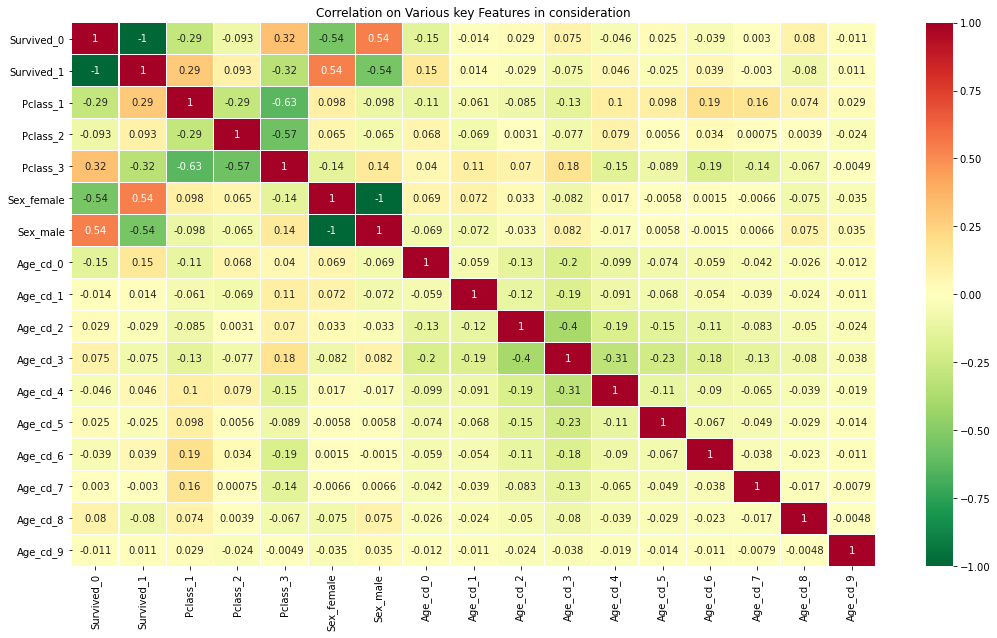

In [10]:
h = sns.heatmap(pd.get_dummies(df[['Survived', 'Pclass', 'Sex', 'Age_cd']], 
               columns=['Survived', 'Pclass', 'Sex', 'Age_cd']).corr(),
           annot=True,cmap='RdYlGn_r',linewidths=0.2)

fig=plt.gcf()

h.set_title('Correlation on Various key Features in consideration')

fig.set_size_inches([18,10])

plt.show()

In [11]:
# X = pd.DataFrame(df, columns=['Fare','Parch'])
features = ['Pclass', 'SibSp', 'Parch', 'Fare',  'Age_cd', 'Sex_cd', 'Embarked_cd']
X = pd.DataFrame(df[features])
y = pd.DataFrame(df, columns=['Survived'])

In [12]:
X_oe = pd.get_dummies(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_oe, y)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668, 1)
(223, 1)


In [15]:
# std = StandardScaler()
# X_train = std.fit_transform(X_train)
# X_test = std.fit_transform(X_test)

In [16]:
clf = SGDClassifier()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0])

In [18]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.25


In [19]:
score = clf.score(X_test, y_test)
score

0.7533632286995515

In [20]:
model = 'titanic_classifier.joblib.pkl'
joblib.dump(clf, model)

['titanic_classifier.joblib.pkl']

In [21]:
clf2 = joblib.load(model)
clf2

SGDClassifier()

In [22]:
X_testtest = pd.DataFrame(df_test[features])
X_test_oe = pd.get_dummies(X_testtest)

In [23]:
screen_data(X_test_oe)

----------------------------------------
Columns :  ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age_cd', 'Sex_cd', 'Embarked_cd']
----------------------------------------
Total entries :  418
----------------------------------------
Missing Values in the columns : 

Pclass         0
SibSp          0
Parch          0
Fare           0
Age_cd         0
Sex_cd         0
Embarked_cd    0
dtype: int64
----------------------------------------
Unique Value Counts : 

Pclass           3
SibSp            7
Parch            8
Fare           170
Age_cd          10
Sex_cd           2
Embarked_cd      3
dtype: int64
----------------------------------------


In [24]:
# X_test_oe['Fare'] = X_test_oe['Fare'].fillna(0)

In [25]:
y_predpred = clf2.predict(X_test_oe)

In [26]:
clf2.score(X_test_oe, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [223, 418]

In [27]:
df_res = pd.DataFrame({'PassengerId' : df_test['PassengerId'], 'Survived': y_predpred})
df_res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
df_res.to_csv('titanic_submission2.csv')

In [29]:
screen_data(df_res)

----------------------------------------
Columns :  ['PassengerId', 'Survived']
----------------------------------------
Total entries :  418
----------------------------------------
Missing Values in the columns : 

PassengerId    0
Survived       0
dtype: int64
----------------------------------------
Unique Value Counts : 

PassengerId    418
Survived         2
dtype: int64
----------------------------------------


In [30]:
df_res['Survived'].value_counts()

0    296
1    122
Name: Survived, dtype: int64